In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
s1 = pd.read_csv('data/v11i1ATPspd_std273s1.csv', names=['spd','std'])
s2 = pd.read_csv('data/v11i2ATPspd_std273s1.csv', names=['spd','std'])
ATP = np.array([500,1000,1500,2000,2500,3000,3500,4000,4500])

In [3]:
atp = ATP; #NB: atp is the substrate [s]
s_a = s1['spd']; s_h = s2['spd']

def michaelisA(atp,km):
    return( (atp*s_a.max())/(atp+km) )
poptA, pcovA = curve_fit(michaelisA, atp, s_a)
kmValA = poptA[0]
yValA = ( atp*s_a.max() ) / (kmValA+atp) # yVakl V = Vmax
#========================================================
def michaelisH(atp,km):
    return( (atp*s_h.max())/(atp+km) )
poptH, pcovH = curve_fit(michaelisH, atp, s_h)
kmValH = poptH[0]
yValH = ( atp*s_h.max() ) / (kmValH+atp)

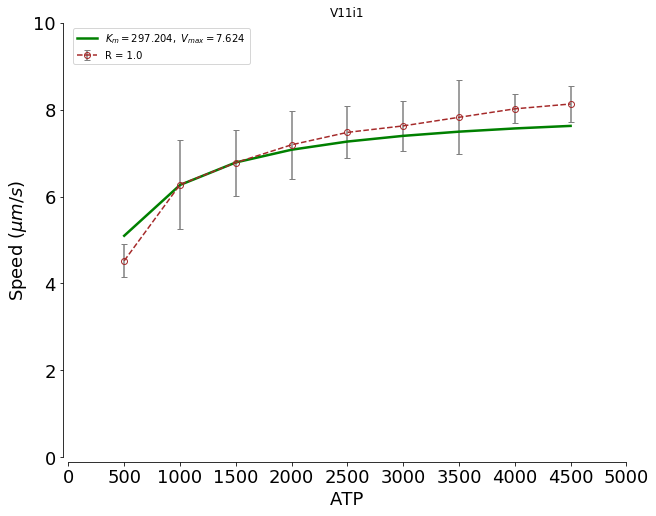

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(ATP,s1['spd'],s1['std'], capsize=3, linestyle='--', color='brown', marker='o', markerfacecolor='none', ecolor='grey', label='R = 1.0')
ax.plot(ATP,michaelisA(atp,*poptA),'g-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmValA,np.max(yValA)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(0,12,2))
ax.set_xticks(np.arange(0,5001,500))
ax.spines['left'].set_bounds(0,10)
ax.spines['bottom'].set_bounds(0,5000)
ax.spines['left'].set_position(('axes', -0.01))
ax.spines['bottom'].set_position(('axes', -0.01))
ax.tick_params(labelsize=18)

ax.set_xlabel('ATP', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.set_title('V11i1')

ax.legend(loc='upper left')

#plt.savefig('fig/V11i1ATPspeed.png', fmt='png', dpi=1500, bbox_inches='tight')
#plt.savefig('fig/V11i1ATPspeed.svg', fmt='svg', dpi=1500, bbox_inches='tight')
plt.show()

In [5]:
xx = 1/ATP
yyA = 1/s1['spd']; yyH = 1/s2['spd']

slopeA, interceptA, r_valueA, p_valueA, std_errA = stats.linregress(xx,yyA)
vmaxA = 1/interceptA; kmA = slopeA/interceptA
#============================================
slopeH, interceptH, r_valueH, p_valueH, std_errH = stats.linregress(xx,yyH)
vmaxH = 1/interceptH; kmH = slopeH/interceptH

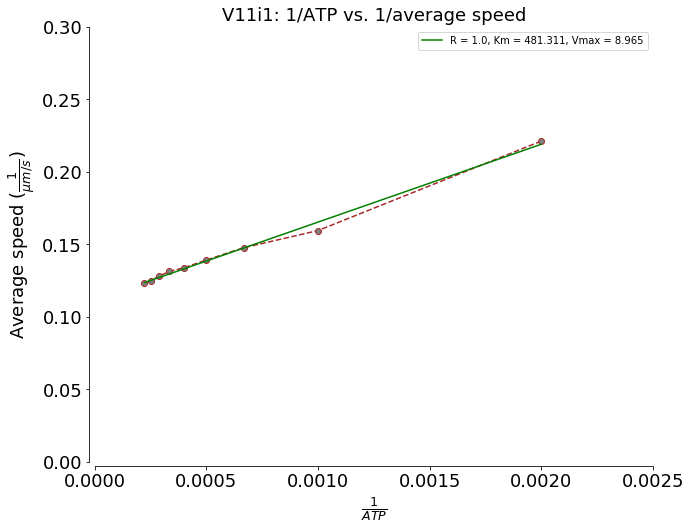

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(xx,yyA, marker='o', color='brown', linestyle='--', markerfacecolor='grey')
plt.plot(xx,(slopeA*xx+interceptA), color='green', label='R = 1.0, Km = %.3f, Vmax = %.3f'%(kmA,vmaxA))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.003,step=0.0005))
ax.set_yticks(np.arange(0,0.31,step=0.05))
ax.spines['bottom'].set_position(('axes', -0.01))
ax.spines['left'].set_position(('axes', -0.01))
ax.tick_params(labelsize=18)

ax.set_title('V11i1: 1/ATP vs. 1/average speed', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
ax.legend(loc='best')
#ax.grid()

#plt.savefig('fig/V11i1InvFitATP500to4500.png',fmt='png',dpi=1500, bbox_inches='tight')
#plt.savefig('fig/V11i1InvFitATP500to4500.svg',fmt='svg',dpi=1000, bbox_inches='tight')

plt.show()

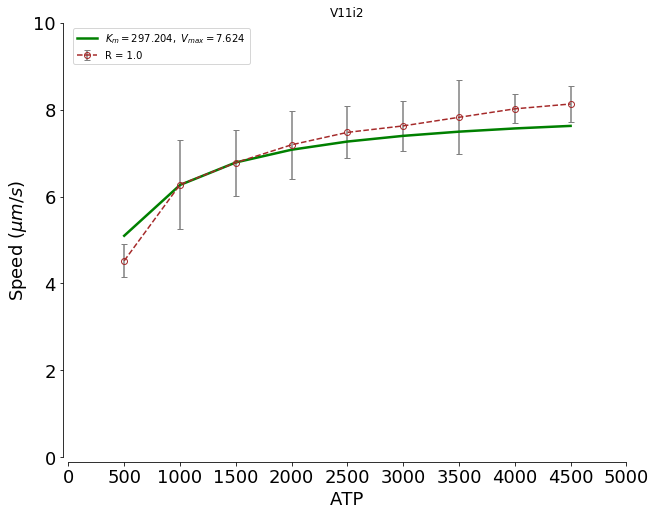

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(ATP,s2['spd'],s2['std'], capsize=3, linestyle='--', color='brown', marker='o', markerfacecolor='none', ecolor='grey', label='R = 1.0')
ax.plot(ATP,michaelisH(atp,*poptH),'g-', lw=2.5, label='$K_m = %.3f,\ V_{max} = %.3f$'%(kmValH,np.max(yValH)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(0,12,2))
ax.set_xticks(np.arange(0,5001,500))
ax.spines['left'].set_bounds(0,10)
ax.spines['bottom'].set_bounds(0,5000)
ax.spines['left'].set_position(('axes', -0.01))
ax.spines['bottom'].set_position(('axes', -0.01))
ax.tick_params(labelsize=18)

ax.set_xlabel('ATP', fontsize=18)
ax.set_ylabel('Speed ($\mu m/s$)', fontsize=18)
ax.set_title('V11i2')

ax.legend(loc='upper left')

#plt.savefig('fig/V11i2ATPspeed.png', fmt='png', dpi=1500, bbox_inches='tight')
#plt.savefig('fig/V11i2ATPspeed.svg', fmt='svg', dpi=1500, bbox_inches='tight')
plt.show()

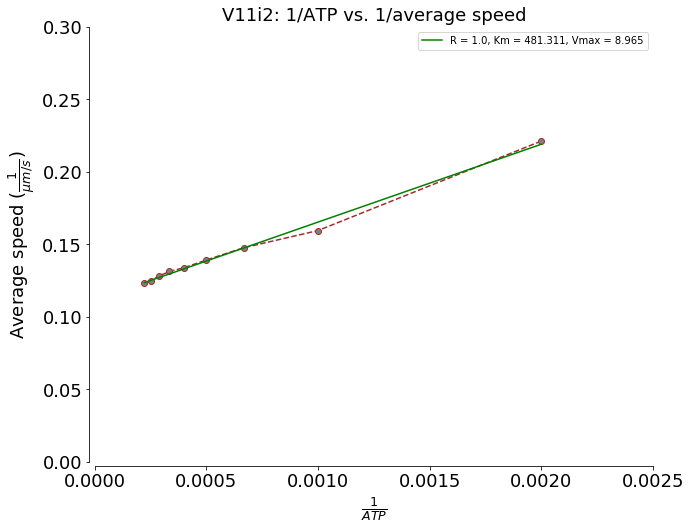

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(xx,yyH, marker='o', color='brown', linestyle='--', markerfacecolor='grey')
plt.plot(xx,(slopeH*xx+interceptH), color='green', label='R = 1.0, Km = %.3f, Vmax = %.3f'%(kmH,vmaxH))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.003,step=0.0005))
ax.set_yticks(np.arange(0,0.31,step=0.05))
ax.spines['bottom'].set_position(('axes', -0.01))
ax.spines['left'].set_position(('axes', -0.01))
ax.tick_params(labelsize=18)

ax.set_title('V11i2: 1/ATP vs. 1/average speed', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
ax.legend(loc='best')
#ax.grid()

#plt.savefig('fig/V11i2InvFitATP500to4500.png',fmt='png',dpi=1500, bbox_inches='tight')
#plt.savefig('fig/V11i2InvFitATP500to4500.svg',fmt='svg',dpi=1000, bbox_inches='tight')

plt.show()